In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/antipins/Documents/DS_12_04_2023-main/EDA/police shootings.csv")
data.head(5)

id                name        date   manner_of_death       armed   age  \
0   1          Tim Elliot  2015-01-02              shot         gun  53.0   
1   2    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   3  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   4     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   5   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [4]:
data.shape

(7729, 17)

In [5]:
data.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

##### –î–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∞–±—Ä–µ–≤–∏–∞—Ç—É—Ä—ã —à—Ç–∞—Ç–æ–≤ –≤ –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–µ –Ω–∞–∑–≤–∞–Ω–∏—è, –¥–ª—è –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–π —Ä–∞–±–æ—Ç—ã

In [6]:
data.state.unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [113]:
data['statefn'] = 0   # –ü—Ä–æ—Å—Ç–æ –¥–ª—è —Å–µ–±—è –ø–æ–º–µ—Ç–∫—É –¥–µ–ª–∞–ª, –≤ –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä–∞—Ö —Ç—è–∂–µ–ª–æ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è
data['statefn'] = data['state'].replace(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
                                        'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
                                        'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
                                        'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
                                         'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'],
                                        ['Washington', 'Oregon', 'Kansas', 'California', 'Colorado', 'Oklahoma', 'Arizona',
                                        'Iowa', 'Pennsylvania', 'Texas', 'Ohio', 'Louisiana', 'Montana', 'Utah', 'Arkansas',
                                        'Illinois', 'Nevada', ' New Mexico', 'Minnesota', 'Missouri', 'Virginia', 'New Jersey',
                                        'Indiana', 'Kentucky', 'Massachusetts', 'New Hampshire', 'Florida', 'Idaho', 'Maryland', 'Nebraska',
                                        'Michigan', 'Georgia', 'Tennessee', 'North Carolina', 'Alaska', 'New York', 'Maine',
                                        'Alabama', 'Mississippi', 'Wisconsin', 'South Carolina', 'Delaware', 'Columbia',
                                        'West Virginia', 'Hawai', 'Wyoming', 'North Dakota', 'Connecticut', 'South Dakota',
                                        'Vermont', 'Rhode Island'])

### –ù–∞—á–Ω–µ–º —Å –ø–æ–ø—ã—Ç–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [8]:
df1 = data['armed'].value_counts()
df1[df1>50]

gun               4407
knife             1108
unarmed            456
undetermined       313
vehicle            276
toy weapon         245
unknown weapon     119
machete             61
Name: armed, dtype: int64

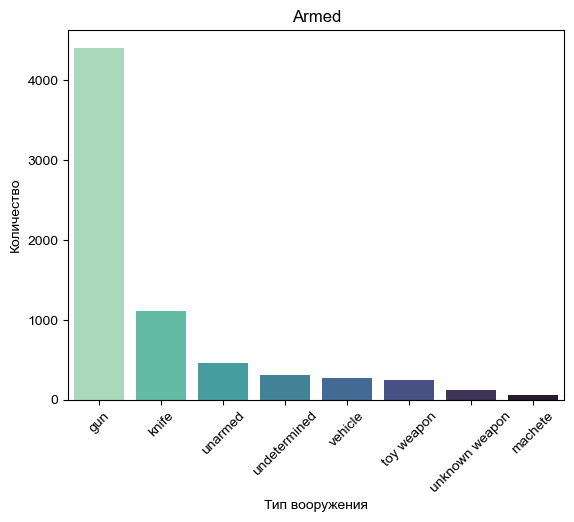

In [9]:
sns.barplot(x = df1[df1>50].index, y = df1[df1>50], palette = 'mako_r')
sns.set(font_scale = 1)
plt.xlabel('–¢–∏–ø –≤–æ–æ—Ä—É–∂–µ–Ω–∏—è')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.xticks(rotation=45)
plt.title('Armed')
plt.show()

##### –ö–∞–∫ –º—ã –≤–∏–¥–∏–º –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞, –Ω–∞–∏–±–æ–ª—å—à–µ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å—é –ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å—Ç—Ä–µ–ª–∫–æ–≤–æ–µ –æ—Ä—É–∂–∏–µ
–ó–∞–ø–æ–ª–Ω–∏–º –≤—Å–µ –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∏–ø–æ–º "gun", –∫–æ–æ—Ä–¥–∏–Ω–∞–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è, –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –æ–±—â—É—é –∫–∞—Ä—Ç–∏–Ω—É, –Ω–µ –≤–Ω–µ—Å—É—Ç. –ü–æ—ç—Ç–æ–º—É –º–æ–∂–µ–º –ø—Ä–∏—Å–≤–∞–∏–≤–∞—Ç—å –±–µ–∑ –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–π

In [10]:
data['armed'].fillna('gun', inplace = True)

In [11]:
data['age'].nunique()

81

In [12]:
data['age'].max(), data['age'].min()

(92.0, 2.0)

###### –ö–∞–∫ –≤–∏–¥–Ω–æ, —Å–∞–º–æ–º—É –º–æ–ª–æ–¥–æ–º—É "–ø—Ä–µ—Å—Ç—É–ø–Ω–∏–∫—É", –≤—Å–µ–≥–æ 2 –≥–æ–¥–∞?! –ê —Å–∞–º–æ–º—É –ø–æ–∂–∏–ª–æ–º—É –∞–∂ 92. –ú—ã –º–æ–∂–µ–º —Ç–æ–ª—å–∫–æ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—Ç—å, —á—Ç–æ –º–æ–≥–ª–∏ —Å–æ–≤–µ—Ä—à–∏—Ç—å –¥–≤–∞ —Ç–∞–∫–∏—Ö —Ä–µ—Ü–∏–¥–∏–≤–∏—Å—Ç–∞ XD
_–í –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö, —Ä–∞—Å–æ–≤–∞—è –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –Ω–µ —É–∫–∞–∑–∞–Ω–∞_

In [13]:
data.loc[data['age']==2]

id                     name        date manner_of_death    armed  age  \
7240  7241  Clesslynn Jane Crawford  2022-03-26            shot  unarmed  2.0   

     gender race            city state  signs_of_mental_illness threat_level  \
7240      F  NaN  Baxter Springs    KS                    False        other   

     flee  body_camera  longitude  latitude  is_geocoding_exact statefn  
7240  NaN        False    -94.736    37.024                True  Kansas

In [14]:
data[data['age']==92]

id name        date manner_of_death armed   age gender race      city  \
6871  6872  NaN  2021-11-16            shot   gun  92.0      M  NaN  Caldwell   

     state  signs_of_mental_illness threat_level         flee  body_camera  \
6871    ID                    False       attack  Not fleeing        False   

      longitude  latitude  is_geocoding_exact statefn  
6871        NaN       NaN                True   Idaho

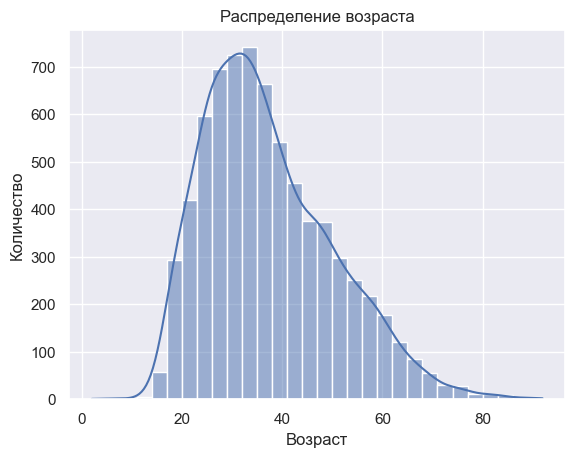

In [15]:
sns.histplot(x = data['age'], kde = True, binwidth = 3)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

In [16]:
data['age'].mean()

37.17897060852766

_–ü–æ–ø—Ä–æ–±—É–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ä–µ–¥–Ω–∏–º –≤–æ–∑—Ä–∞—Å—Ç–æ–º –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, —á—Ç–æ –∏–∑–º–µ–Ω–∏—Ç—Å—è_

In [17]:
data['age'].fillna(37, inplace = True)
data['age'].isnull().sum() # –ü—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç–∞ –±–æ–ª—å—à–µ –Ω–µ—Ç

0

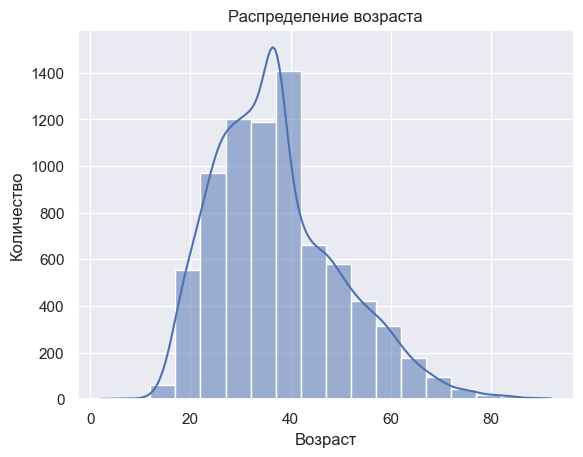

In [18]:
sns.histplot(x = data['age'], kde = True, binwidth = 5)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞')
plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

In [19]:
data['gender'].value_counts()

M    7361
F     348
Name: gender, dtype: int64

_–ü—Ä–æ–ø—É—â–µ–Ω–æ –≤—Å–µ–≥–æ 20 –∑–Ω–∞—á–µ–Ω–∏–π 'gender', –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –≤—ã–±—Ä–æ—Å–∏—Ç—å_

In [20]:
data.dropna(how = 'any', subset = 'gender', inplace = True)

In [21]:
data.gender.isnull().sum()

0

In [22]:
data.isnull().sum()

id                            0
name                        402
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1442
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   833
latitude                    833
is_geocoding_exact            0
statefn                       0
dtype: int64

_–ü—Ä–∏–¥—É–º–∞–µ–º, —á—Ç–æ —Å–¥–µ–ª–∞—Ç—å —Å –¥–∞–Ω–Ω—ã–º–∏ 'flee'_

In [23]:
data['flee'].value_counts()

Not fleeing    4333
Car            1247
Foot            979
Other           287
Name: flee, dtype: int64

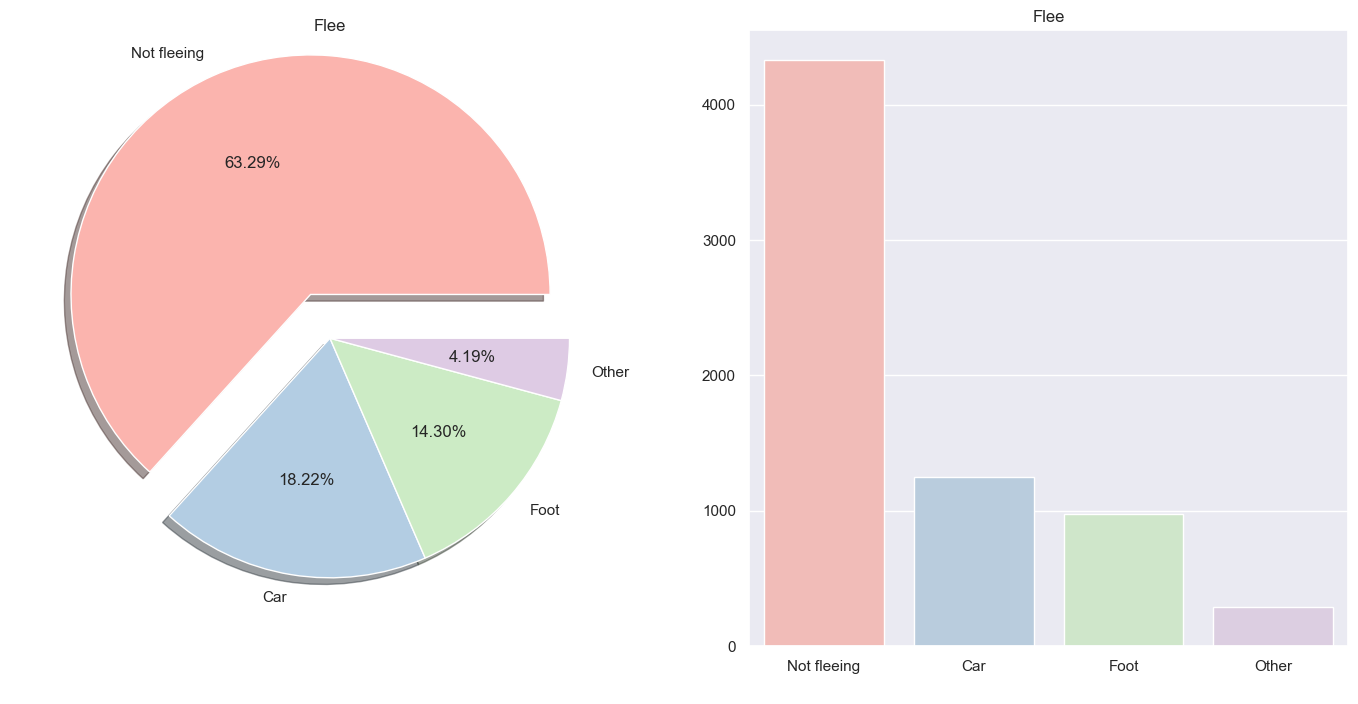

In [24]:
### plt.pie(data['flee'].value_counts(), labels = data['flee'].value_counts().index,
#        explode = [0.2, 0, 0, 0], shadow = True, autopct = '%1.2f%%',
#        colors = sns.color_palette('Pastel1'))
#        —Å —Ç–∞–∫–∏–º –∫–æ–¥–æ–º –ø—Ä–∏—Å–≤–æ–∏—Ç—å –ø–æ–ª–æ–∂–µ–Ω–∏–µ ax0 –∏–ª–∏ 1 —É –º–µ–Ω—è –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å

f,ax = plt.subplots(1, 2, figsize = (17, 8))
data['flee'].value_counts().plot.pie(explode = [0.2, 0, 0, 0],autopct='%1.2f%%',
                                     shadow=True, ax = ax[0], colors = sns.color_palette('Pastel1'))    
ax[0].set_title('Flee')
ax[0].set_ylabel(' ')
sns.countplot(data=data, x= 'flee', palette = 'Pastel1', ax = ax[1])
ax[1].set_title('Flee')
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
plt.show()

 _–ü–æ–π–¥—è –ø–æ –ø—É—Ç–∏ –Ω–∞–∏–º–µ–Ω—å—à–µ–≥–æ —Å–æ–ø—Ä–æ—Ç–∏–≤–ª–µ–Ω–∏—è, —Ç–∞–∫ –∂–µ –ø—Ä–∏—Å–≤–æ–∏–º –≤—Å–µ –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ 'Not fleeng'_

In [25]:
data.loc[(data['flee'].isnull()&data['longitude'].isnull())].isnull().sum()

id                           0
name                        32
date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                       126
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       172
body_camera                  0
longitude                  172
latitude                   172
is_geocoding_exact           0
statefn                      0
dtype: int64

 _–ü—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å –≤–∞—Ä–∏–∞–Ω—Ç–æ–º –ø–æ–±–µ–≥–∞, –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏, —Ç–∞–∫ –µ—â–µ –∏ —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π —Ä–∞—Å–æ–π, –≤ –±—É–¥—É—â–µ–º, —Ç–æ—á–Ω–æ –Ω–∏—á–µ–≥–æ –Ω–µ –¥–∞–¥—É—Ç,
–ø–æ—ç—Ç–æ–º—É, –∫–∞–∫ —É–∂–µ –±—ã–ª–æ –Ω–∞–ø–∏—Å–∞–Ω–æ —Ä–∞–Ω–µ–µ, –¥–∞–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ —É–¥–∞–ª–∏–º, –∞ –æ—Å—Ç–∞–≤—à–∏–º—Å—è –ø—É—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º 'flee', –ø—Ä–∏—Å–≤–æ–∏–º "not fleeing"_ 

In [26]:
data.dropna(how = 'all', subset = ['flee', 'longitude'], inplace = True)

In [27]:
data.isnull().sum()

id                            0
name                        370
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1316
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        691
body_camera                   0
longitude                   661
latitude                    661
is_geocoding_exact            0
statefn                       0
dtype: int64

_–ü–æ –≤—Å–µ–π –≤–∏–¥–∏–º–æ—Å—Ç–∏,  —É–¥–∞–ª–∏–ª–æ—Å—å –∫–∞–∫ —Ä–∞–∑ —Ç–æ, —á—Ç–æ –∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–ª–æ—Å—å! –ß—Ç–æ –Ω–µ –º–æ–∂–µ—Ç –Ω–µ —Ä–∞–¥–æ–≤–∞—Ç—å_ üòÇ

_–î–∞–ª–µ–µ, –∑–∞–ø–æ–ª–Ω—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è_

In [28]:
data['flee'].fillna('Not fleeing', inplace = True)

In [29]:
data['flee'].isnull().sum()

0

In [30]:
data.isnull().sum()

id                            0
name                        370
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1316
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                          0
body_camera                   0
longitude                   661
latitude                    661
is_geocoding_exact            0
statefn                       0
dtype: int64

##### –ß–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å —Ä–∞—Å—ã, —á–µ—Å—Ç–Ω–æ –≥–æ–≤–æ—Ä—è, –Ω–µ –ø—Ä–∏–¥—É–º–∞–ª, —Ç–∞–º –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ –±—É–¥–µ—Ç "–º–∞–ª—å—Ü–µ–º –≤ –Ω–µ–±–æ", –ø–æ—ç—Ç–æ–º—É —Ä–µ—à–∏–ª –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ –ø–æ–∫–∞ –æ—Å—Ç–∞–≤–∏—Ç—å –∏—Ö –ø—É—Å—Ç—ã–º–∏. –° –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ —Ç–∞ –∂–µ —Å–∏—Ç—É–∞—Ü–∏—è, –∏—Ö –ª–∏–±–æ —É–¥–∞–ª—è—Ç—å, –ª–∏–±–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ –µ—Å—Ç—å, –ø–æ–∫–∞ –Ω–µ –º–µ—à–∞—é—Ç

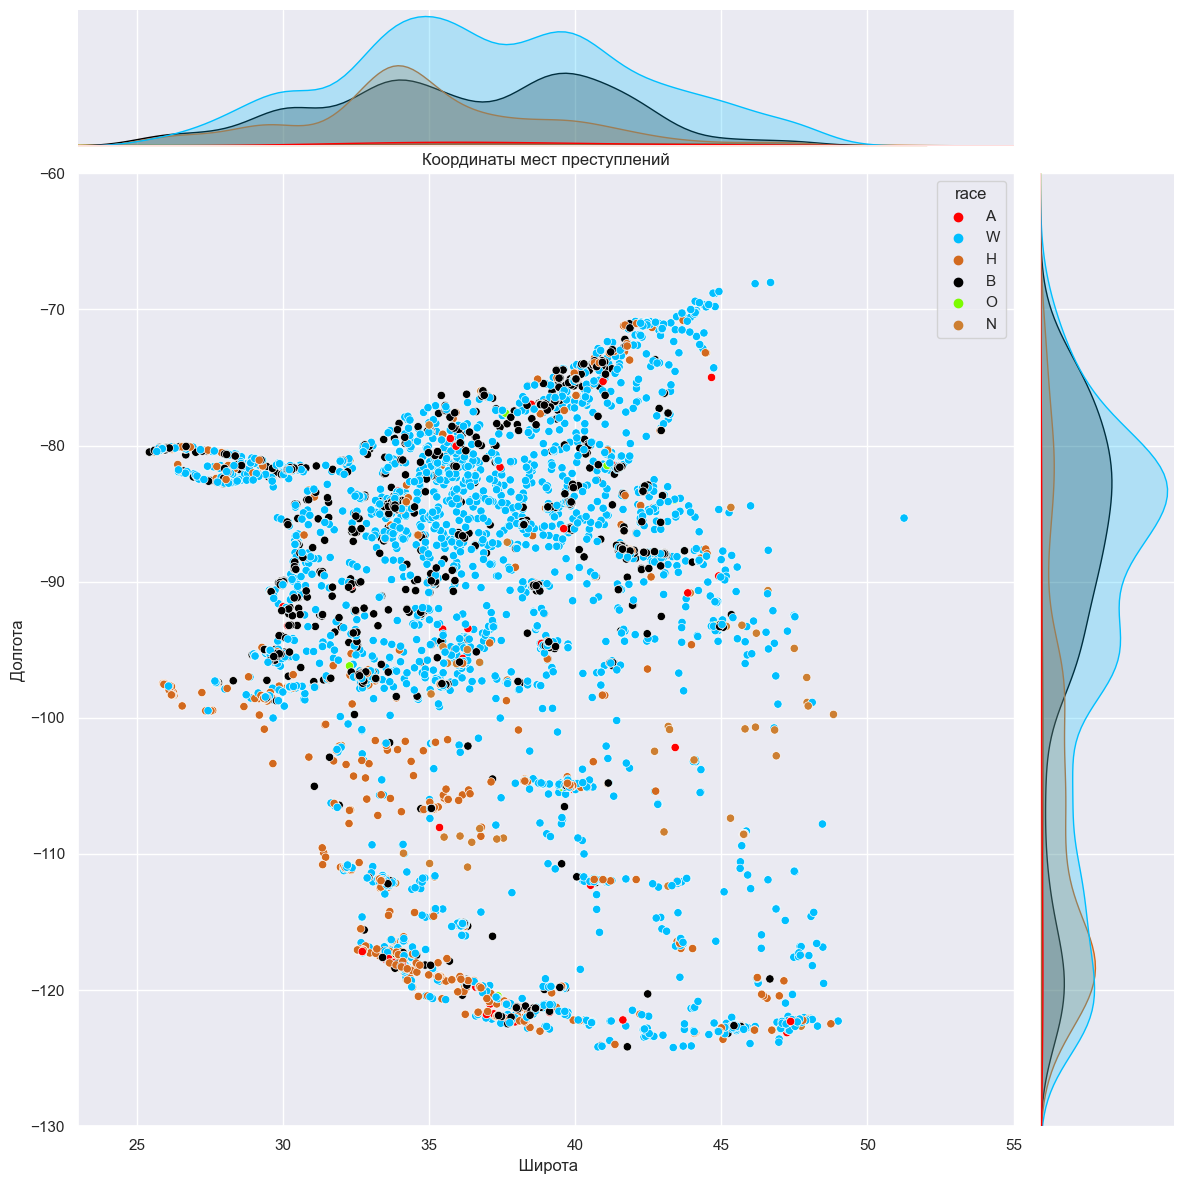

In [31]:
sp = sns.jointplot(x = 'latitude', y = 'longitude',hue = 'race',
              data=data,height = 12, ratio = 6,
              xlim = [23, 55], ylim = [-130, -60],  ### –ö—Ä–∞—è –æ–±—Ä–µ–∑–∞–ª, —Ç–∞–º –±—ã–ª–∏ –µ–¥–∏–Ω–∏—á–Ω—ã–µ —Ç–æ—á–∫–∏, –æ–Ω–∏ —Å–æ–∑–¥–∞–≤–∞–ª–∏ —Ç–æ–ª—å–∫–æ "—à—É–º—ã"
              palette = ['#FF0000', '#00BFFF', '#D2691E', '#000000', '#7CFC00', '#CD7F32']) ### –∏ —Å–∏–ª—å–Ω–æ —É–º–µ–Ω—å—à–∞–ª–∏ –º–∞—Å—à—Ç–∞–±
plt.xlabel(' –®–∏—Ä–æ—Ç–∞')
plt.ylabel('–î–æ–ª–≥–æ—Ç–∞')
plt.title('–ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –º–µ—Å—Ç –ø—Ä–µ—Å—Ç—É–ø–ª–µ–Ω–∏–π')
plt.show()

_–ò–∑ –≤—ã—à–µ–ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –ø–æ–¥–∞–≤–ª—è—é—â–µ–µ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–µ—Å—Ç—É–ø–ª–µ–Ω–∏–π –±—ã–ª–æ —Å–æ–≤–µ—Ä—à–µ–Ω–æ "–±–µ–ª—ã–º–∏",
–Ω–æ —ç—Ç–æ–≥–æ –Ω–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ, —á—Ç–æ–±—ã –¥–µ–ª–∞—Ç—å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã_

### –†–∞–±–æ—Ç–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥–∞—Ç—ã

In [32]:
data['date'] = data['date'].astype('datetime64')

In [33]:
data['year'] = data['date'].dt.year ### —Ä–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞—Ç—ã –Ω–∞ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
data['month'] = data['date'].dt.month

In [34]:
data.head(3)

id                name       date   manner_of_death    armed   age gender  \
0   1          Tim Elliot 2015-01-02              shot      gun  53.0      M   
1   2    Lewis Lee Lembke 2015-01-02              shot      gun  47.0      M   
2   3  John Paul Quintero 2015-01-03  shot and Tasered  unarmed  23.0      M   

  race     city state  signs_of_mental_illness threat_level         flee  \
0    A  Shelton    WA                     True       attack  Not fleeing   
1    W    Aloha    OR                    False       attack  Not fleeing   
2    H  Wichita    KS                    False        other  Not fleeing   

   body_camera  longitude  latitude  is_geocoding_exact     statefn  year  \
0        False   -123.122    47.247                True  Washington  2015   
1        False   -122.892    45.487                True      Oregon  2015   
2        False    -97.281    37.695                True      Kansas  2015   

   month  
0      1  
1      1  
2      1

In [35]:
data['manner_of_death'].value_counts()

shot                7198
shot and Tasered     339
Name: manner_of_death, dtype: int64

In [36]:
pd.crosstab([data['race'],data['manner_of_death']], data['month'],
            margins=True).style.background_gradient(cmap = 'summer_r')

_–ü—Ä–∏ —Ä–∞–∑–±–∏–µ–Ω–∏–∏ –Ω–∞ –º–µ—Å—è—Ü–∞, –∫–∞—Ä—Ç–∏–Ω–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞–ª—å–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è, –≤—Å–µ —Ä–∞–≤–Ω–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ —Å—Ç—Ä–∞–¥–∞—é—Ç –±–µ–ª—ã–µ.
–°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π –¥–∞–Ω–Ω–æ–≥–æ —Ü–≤–µ—Ç–∞ –∫–æ–∂–∏ –≤ –ê–º–µ—Ä–∏–∫–µ. –ó–∞ –Ω–∏–º–∏  —Å–ª–µ–¥—É—é—Ç –∞—Ñ—Ä–æ- –∏ –ª–∞—Ç–∏–Ω–æ–∞–º–µ—Ä–∏–∫–∞–Ω—Ü—ã_

In [37]:
ct = pd.crosstab([data['race'],data['manner_of_death']], data['year'],
            margins=True).style.background_gradient(cmap = 'summer_r')
ct

_–ü–æ –≥–æ–¥–∞–º —Å–∏—Ç—É–∞—Ü–∏—è —Ç–∞–∫ –∂–µ —Å–∫–ª–∞–¥—ã–≤–∞–µ—Ç—Å—è –Ω–µ –≤ –ø–æ–ª—å–∑—É –±–µ–ª—ã—Ö_

In [38]:
df2020 = pd.DataFrame({'Race':['White', 'Black', ### –ò–Ω—Ñ—É –±—Ä–∞–ª —Å https://www.statdata.ru/nacionalnyj-sostav-usa
                               'Hispanic', 'Asiat', 'N_Americ', 'Other'],
                       'People':[0.578,0.121,0.187,0.059,0.009,0.046],
                      'Shot': [437, 224, 164, 13, 7, 3]})
df2020.set_index('Race', inplace = True)
df2020.style.background_gradient('summer_r')

_–í –¥–∞–Ω–Ω—ã–π –¥–∞—Ç–∞ —Å–µ—Ç –≤—ã–Ω–µ—Å –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–∞—Å–µ–ª–µ–Ω–∏—è –∏ –ø—Ä–µ—Å—Ç—É–ø–ª–µ–Ω–∏–π –∑–∞ 2020–≥_

In [39]:
df2020['Values']=df2020['Shot']/df2020['People']
df2020.style.background_gradient(cmap = 'summer_r')

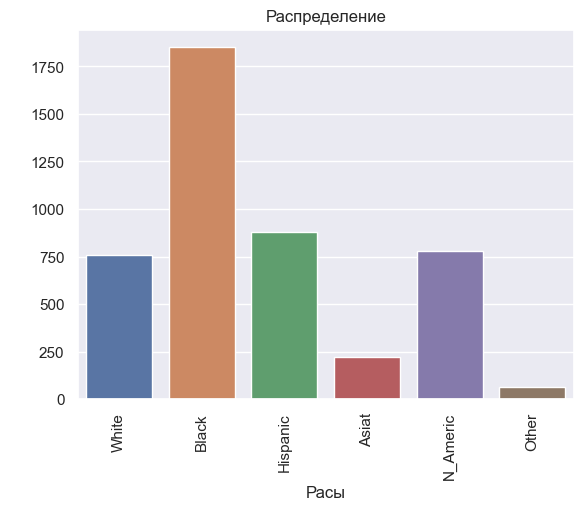

In [40]:
sns.barplot(x = df2020.index, y = 'Values', data=df2020)
plt.xticks(rotation = 90) 
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
plt.xlabel('–†–∞—Å—ã')
plt.ylabel(' ')
plt.show()

### –í—ã–≤–æ–¥
_–ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–π –≤—ã—à–µ –ø–æ–¥—Å—á–µ—Ç, –≤–µ—Å—å–º–∞ —É—Å–ª–æ–≤–Ω—ã–π, –∏ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Ç–æ—á–Ω—ã–º, –Ω–æ —ç—Ç–æ–≥–æ –∏ –Ω–µ –Ω—É–∂–Ω–æ, –≤–µ–¥—å –∑–∞–¥–∞—á–∞ —Å—Ç–æ—è–ª–∞ –≤—ã—è—Å–Ω–∏—Ç—å, –µ—Å—Ç—å –ª–∏ —Å–≤—è–∑—å —Å —Ä–∞—Å–∏–∑–º–æ–º. –ò –¥–∞, –æ–Ω–∞ –µ—Å—Ç—å, –≤–µ–¥—å –∫–∞–∑–∞–ª–æ—Å—å –±—ã, –Ω–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥ –≤—Å–µ –æ—á–µ–≤–∏–¥–Ω–æ, –±–µ–ª—ã—Ö –±—ã–ª–æ –∑–∞—Å—Ç—Ä–µ–ª–µ–Ω–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ, –Ω–æ —ç—Ç–æ —Ç–æ–ª—å–∫–æ –Ω–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥, –≤–µ–¥—å —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–¥—Å—á–µ—Ç–∞–º –Ω–∞—Å–µ–ª–µ–Ω–∏—è –Ω–∞ 2020–≥. –≤ –ê–º–µ—Ä–∏–∫–µ –ø–æ—á—Ç–∏ 58% –Ω–∞—Å–µ–ª–µ–Ω–∏—è —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –ê–º–µ—Ä–∏–∫–∞–Ω—Ü—ã —Å–æ —Å–≤–µ—Ç–ª—ã–º —Ü–≤–µ—Ç–æ–º –∫–æ–∂–∏, –∞ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è 42% —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –º–µ–∂–¥—É –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ —Ä–∞—Å–∞–º–∏, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –Ω–µ –º–∞–ª–æ. –í–æ—Ç –∏ –≤—ã—Ö–æ–¥–∏—Ç, –æ–≥—Ä–æ–º–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ—Å—Ç—É–ø–ª–µ–Ω–∏–π —Å—Ä–µ–¥–∏ –±–µ–ª—ã—Ö, –Ω–∏–≤–µ–ª–∏—Ä—É–µ—Ç—Å—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å—é –Ω–∞—Å–µ–ª–µ–Ω–∏—è, —á–µ–≥–æ –Ω–µ–ª—å–∑—è —Å–∫–∞–∑–∞—Ç—å –æ–± –∏—Ö —Ç–µ–º–Ω–æ–∫–æ–∂–∏—Ö "–∫–æ–ª–ª–µ–≥–∞—Ö –ø–æ —Ä–µ–º–µ—Å–ª—É". –°–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö –ø—Ä–µ—Å—Ç—É–ø–ª–µ–Ω–∏–π —Å—Ä–µ–¥–∏ –Ω–∏—Ö, –∫–∞–∫ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ –≤—ã—à–µ, –ø–æ—á—Ç–∏ –≤ 2 —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ, –Ω–æ –µ—Å–ª–∏ —Å–º–æ—Ç—Ä–µ—Ç—å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, —Ç–æ –∫–∞—Ä—Ç–∏–Ω–∞ –≤—ã—Ä–∏—Å–æ–≤—ã–≤–∞–µ—Ç—Å—è —É–¥—Ä—É—á–∞—é—â–∞—è, –≤–µ–¥—å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –Ω–∞—Å–µ–ª–µ–Ω–∏—è —Å—Ä–µ–¥–∏ –∞—Ñ—Ä–æ–∞–º–µ—Ä–∏–∫–∞–Ω—Ü–µ–≤ –ø–æ—á—Ç–∏ –≤ 5 —Ä–∞–∑ –º–µ–Ω—å—à–µ, —á–µ–º —Å—Ä–µ–¥–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π —Å–≤–µ—Ç–ª–æ–≥–æ —Ü–≤–µ—Ç–∞ –∫–æ–∂–∏.
–õ–æ—è–ª—å–Ω–µ–µ –≤—Å–µ–≥–æ –ø–æ–ª–∏—Ü–µ–π—Å–∫–∏–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—è–º –ê–∑–∏–∞—Ç–∫–æ–π –≤–Ω–µ—à–Ω–æ—Å—Ç–∏, –ª–∏–±–æ –ø–æ–¥–∞–≤–ª—è—é—â–µ–µ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∏–∑ –Ω–∏—Ö –¥–æ–±—Ä–æ—Å–æ–≤–µ—Å—Ç–Ω—ã–µ –≥—Ä–∞–∂–¥–∞–Ω–µ, –Ω–µ –ø—Ä–µ—Å—Ç—É–ø–∞—é—â–∏–µ –∑–∞–∫–æ–Ω._

In [41]:
data_bin = data.copy()

In [42]:
data_bin.drop(['id', 'name', 'date'], axis = 1, inplace = True)

In [43]:
data_bin['manner_of_death'].replace(['shot', 'shot and Tasered'], [0,1], inplace =True)

In [97]:
#data_bin['arm_and'] = 0
#for i in data_bin:
#    data_bin['arm_and'] = data.armed.str.extract('([and])')

### –° —ç—Ç–æ–π —Ñ–∏–≥–Ω–µ–π –Ω–µ —Ä–∞–∑–æ–±—Ä–∞–ª—Å—è, —Ö–æ—Ç–µ–ª –≤—ã–Ω–µ—Å—Ç–∏ –≤—Å–µ, –≥–¥–µ –µ—Å—Ç—å "and" –∏ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å —É–∂–µ —Å –∏–º–µ—é—â–∏–º—Å—è, –Ω–æ –æ–Ω –º–Ω–µ –≤—ã–Ω–æ—Å–∏—Ç –∫–∞–∫–∏–µ-—Ç–æ
# –æ—Ç–¥–µ–ª—å–Ω—ã–µ –±—É–∫–≤—ã

In [44]:
data_bin.head(3)

manner_of_death    armed   age gender race     city state  \
0                0      gun  53.0      M    A  Shelton    WA   
1                0      gun  47.0      M    W    Aloha    OR   
2                1  unarmed  23.0      M    H  Wichita    KS   

   signs_of_mental_illness threat_level         flee  body_camera  longitude  \
0                     True       attack  Not fleeing        False   -123.122   
1                    False       attack  Not fleeing        False   -122.892   
2                    False        other  Not fleeing        False    -97.281   

   latitude  is_geocoding_exact     statefn  year  month  
0    47.247                True  Washington  2015      1  
1    45.487                True      Oregon  2015      1  
2    37.695                True      Kansas  2015      1

In [52]:
data_bin.dropna(how = 'any', subset = 'race', inplace = True)

In [110]:
data_bin['gender'].replace(['M', 'F'], [0,1], inplace = True)

In [55]:
data_bin['race'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [56]:
data_bin['race'].replace(['A', 'W', 'H', 'B', 'O', 'N'], [0, 1, 2, 3, 4, 5], inplace = True)
data_bin['signs_of_mental_illness'] = data_bin['signs_of_mental_illness'].astype('int')

In [57]:
data_bin['threat_level'].unique()

array([1, 0], dtype=int64)

In [58]:
data_bin['threat_level'].replace(['other', 'attack', 'undetermined'], [0, 1, 0], inplace = True)

In [59]:
data_bin['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [60]:
data_bin['flee'].replace(['Not fleeing', 'Car', 'Foot', 'Other'], [0, 1, 1, 1], inplace = True)

In [61]:
data_bin.drop(['city', 'state', 'statefn'],axis = 1, inplace = True)

In [62]:
data_bin

manner_of_death       armed   age gender  race  signs_of_mental_illness  \
0                   0         gun  53.0      0     0                        1   
1                   0         gun  47.0      0     1                        0   
2                   1     unarmed  23.0      0     2                        0   
3                   0  toy weapon  32.0      0     1                        1   
4                   0    nail gun  39.0      0     2                        0   
...               ...         ...   ...    ...   ...                      ...   
7691                0         gun  50.0      0     1                        0   
7698                0         gun  37.0      0     3                        0   
7702                0     unarmed  20.0      0     3                        0   
7725                0         gun  37.0      0     1                        0   
7726                0       knife  61.0      0     3                        0   

      threat_level  flee  body_camera  longitude  latitude  \
0                1     0        False   -123.122    47.247   
1                1     0        False   -122.892    45.487   
2                0     0        False    -97.281    37.695   
3                1     0        False   -122.422    37.763   
4                1     0        False   -104.692    40.384   
...            ...   ...          ...        ...       ...   
7691             1     0        False    -81.586    38.334   
7698             1     0        False    -95.495    29.693   
7702             0     0         True    -83.087    39.943   
7725             1     1        False    -86.472    33.775   
7726             0     0        False    -90.290    38.668   

      is_geocoding_exact  year  month  
0                   True  2015      1  
1                   True  2015      1  
2                   True  2015      1  
3                   True  2015      1  
4                   True  2015      1  
...                  ...   ...    ...  
7691                True  2022      8  
7698                True  2022      8  
7702                True  2022      8  
7725                True  2022      9  
7726                True  2022      9  

[6221 rows x 14 columns]

In [65]:
data_bin['body_camera'] = data_bin['body_camera'].astype('int')
data_bin['is_geocoding_exact'] = data_bin['is_geocoding_exact'].astype('int')


In [68]:
data_bin.drop(['longitude', 'latitude'],axis = 1, inplace = True)

In [76]:
data_bin['year'].replace([2015,2016,2017,2018,2019,2020,2021,2022], np.arange(8), inplace = True)

In [77]:
data_bin

manner_of_death       armed   age gender  race  signs_of_mental_illness  \
0                   0         gun  53.0      0     0                        1   
1                   0         gun  47.0      0     1                        0   
2                   1     unarmed  23.0      0     2                        0   
3                   0  toy weapon  32.0      0     1                        1   
4                   0    nail gun  39.0      0     2                        0   
...               ...         ...   ...    ...   ...                      ...   
7691                0         gun  50.0      0     1                        0   
7698                0         gun  37.0      0     3                        0   
7702                0     unarmed  20.0      0     3                        0   
7725                0         gun  37.0      0     1                        0   
7726                0       knife  61.0      0     3                        0   

      threat_level  flee  body_camera  is_geocoding_exact  year  month  
0                1     0            0                   1     0      1  
1                1     0            0                   1     0      1  
2                0     0            0                   1     0      1  
3                1     0            0                   1     0      1  
4                1     0            0                   1     0      1  
...            ...   ...          ...                 ...   ...    ...  
7691             1     0            0                   1     7      8  
7698             1     0            0                   1     7      8  
7702             0     0            1                   1     7      8  
7725             1     1            0                   1     7      9  
7726             0     0            0                   1     7      9  

[6221 rows x 12 columns]

In [79]:
data.age.describe()

count    7537.000000
mean       37.121799
std        12.544286
min         2.000000
25%        28.000000
50%        36.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64

In [80]:
data_bin['age_bin'] = 0
data_bin.loc[data_bin['age']<=15, 'age_bin']=0
data_bin.loc[(data_bin['age']>15)&(data_bin['age']<=28), 'age_bin']=1
data_bin.loc[(data_bin['age']>28)&(data_bin['age']<=41), 'age_bin']=2
data_bin.loc[(data_bin['age']>41)&(data_bin['age']<=54), 'age_bin']=3
data_bin.loc[(data_bin['age']>54)&(data_bin['age']<=67), 'age_bin']=4
data_bin.loc[(data_bin['age']>67)&(data_bin['age']<=80), 'age_bin']=5
data_bin.loc[data_bin['age']>80, 'age_bin']=6

In [84]:
data_bin.drop('age',axis = 1, inplace = True)

In [ ]:
ab = data_bin.armed.value_counts()
ab[ab<50]

In [103]:
data_bin['arm_bin']=0
data_bin.loc[data_bin['armed']=='gun', 'arm_bin']=0
data_bin.loc[data_bin['armed']=='knife', 'arm_bin']=1
data_bin.loc[data_bin['armed']=='unarmed', 'arm_bin']=2
data_bin.loc[data_bin['armed']=='toy weapon', 'arm_bin']=3
data_bin.loc[data_bin['armed']=='vechicle', 'arm_bin']=4
data_bin.loc[data_bin['armed']=='undetermined', 'arm_bin']=5
data_bin.loc[data_bin['armed']=='unknown weapon', 'arm_bin']=6
data_bin.loc[ab[ab<50], 'arm_bin']=7

In [106]:
data_bin.drop('armed', axis = 1, inplace = True)

In [122]:
data_bin.drop('state', axis = 1, inplace = True)

In [123]:
data_bin.dtypes

manner_of_death            int64
gender                     int64
race                       int64
signs_of_mental_illness    int32
threat_level               int64
flee                       int64
body_camera                int32
is_geocoding_exact         int32
year                       int64
month                      int64
age_bin                    int64
arm_bin                    int64
dtype: object

In [124]:
data_bin

manner_of_death  gender  race  signs_of_mental_illness  threat_level  \
0                   0       0     0                        1             1   
1                   0       0     1                        0             1   
2                   1       0     2                        0             0   
3                   0       0     1                        1             1   
4                   0       0     2                        0             1   
...               ...     ...   ...                      ...           ...   
7691                0       0     1                        0             1   
7698                0       0     3                        0             1   
7702                0       0     3                        0             0   
7725                0       0     1                        0             1   
7726                0       0     3                        0             0   

      flee  body_camera  is_geocoding_exact  year  month  age_bin  arm_bin  
0        0            0                   1     0      1        3        0  
1        0            0                   1     0      1        3        7  
2        0            0                   1     0      1        1        7  
3        0            0                   1     0      1        2        7  
4        0            0                   1     0      1        2        7  
...    ...          ...                 ...   ...    ...      ...      ...  
7691     0            0                   1     7      8        3        0  
7698     0            0                   1     7      8        2        0  
7702     0            1                   1     7      8        1        2  
7725     1            0                   1     7      9        2        0  
7726     0            0                   1     7      9        4        1  

[6221 rows x 12 columns]

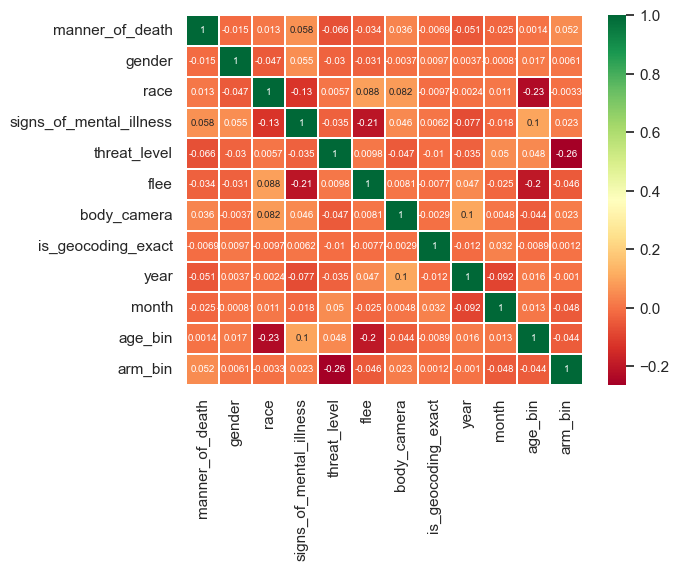

In [134]:
sns.heatmap(data_bin.corr(), annot= True, linewidths=0.2, cmap="RdYlGn", annot_kws={'size':7})
plt.show()

_–ö–∞–∫ –≤–∏–¥–Ω–æ, –∫–∞–∫ —Ç–∞–∫–æ–≤–æ–π —Å–∏–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ –∏–º–µ—é—Ç. –†–∞–∑–≤–µ —á—Ç–æ –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —É—Ä–æ–≤–Ω—è —É–≥—Ä–æ–∑—ã –æ—Ç —Ç–∏–ø–∞ –≤–æ–æ—Ä—É–∂–µ–Ω–∏—è. –¢–∞–∫ –∂–µ –≤–æ–∑—Ä–∞—Å—Ç –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Ä–∞—Å–æ–π –∏ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é –∫  –ø–æ–±–µ–≥—É._

_–ï—â–µ –µ—Å—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –º–µ–Ω—Ç–∞–ª—å–Ω—ã–º –∑–¥–æ—Ä–æ–≤—å–µ–º –∏ —Ä–∞—Å–æ–π, –û–Ω–µ –Ω–µ —è—Ä–∫–æ–≤—ã—Ä–∞–∂–µ–Ω–Ω–∞—è, –Ω–æ –≤—Å–µ –∂–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç._

In [138]:
pd.crosstab(data['race'], data_bin['age_bin']).style.background_gradient('summer_r')

In [ ]:
pd.crosstab(data)

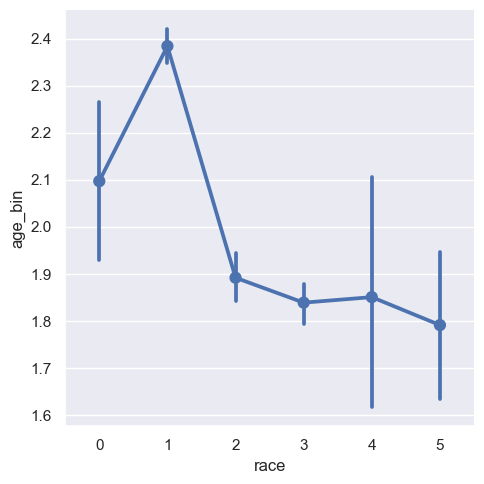

In [155]:
sns.catplot(x = 'race', y = 'age_bin',data=data_bin, kind = 'point')
plt.show()

_–í–∏–¥–Ω–æ, —á—Ç–æ –ø–∏–∫ –ø—Ä–µ—Å—Ç—É–ø–Ω–æ—Å—Ç–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –º–æ–ª–æ–¥—ã—Ö –ª—é–¥–µ–π –¥–æ 40 –ª–µ—Ç, –ø–æ—Å–ª–µ —á–µ–≥–æ –Ω–∞—Å—Ç—É–ø–∞–µ—Ç —Ä–µ–∑–∫–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ._

##### –í—ã–≤–æ–¥ –±—ã–ª –Ω–∞–ø–∏—Å–∞–Ω —Ä–∞–Ω–µ–µ, –ø–æ—Å—Ç—Ä–æ–π–∫–∞ heatmap –Ω–∞ –Ω–µ–≥–æ –Ω–∏–∫–∞–∫ –∫–æ–æ—Ä–¥–∏–Ω–∞–ª—å–Ω–æ –Ω–µ –ø–æ–≤–ª–∏—è–ª–∞